In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline 

### Import Zip Code File
Import and data cleaning

In [2]:
zip_url = 'https://raw.githubusercontent.com/AliceLiu17/KPMG-Sustainable-Future/main/Data/Zip%20Code%20(cleaned).csv'
df_zip= pd.read_csv(zip_url)
df_zip.head()

,Zip Code,City,State,Counties,Multi County,City Alias(es),Area Code,City Type,Classification,Time Zone,...,CBSA Division,CBSA Division Name,CBSA Population,CBSA Division Population,MSA,MSA Name,PMSA,PMSA Name,City State Key,Preferred Last Line Key
0,75201,Dallas,Texas,"Dallas, TX",No,Dallas,"214, 469, 972, 945",P [Post Office],Non-Unique,GMT,...,19124,"Dallas-Plano-Irving, TX",6371773,4230520,1922,"Dallas-Fort Worth, TX CMSA",1920,"Dallas, TX PMSA",W23428,W23428
1,75202,Dallas,Texas,"Dallas, TX",No,Dallas,"214, 469, 972, 946",P [Post Office],Non-Unique,GMT,...,19124,"Dallas-Plano-Irving, TX",6371773,4230520,1922,"Dallas-Fort Worth, TX CMSA",1920,"Dallas, TX PMSA",W23428,W23428
2,75203,Dallas,Texas,"Dallas, TX",No,Dallas,"214, 469",P [Post Office],Non-Unique,GMT,...,19124,"Dallas-Plano-Irving, TX",6371773,4230520,1922,"Dallas-Fort Worth, TX CMSA",1920,"Dallas, TX PMSA",W23428,W23428
3,75204,Dallas,Texas,"Dallas, TX",No,Dallas,"214, 972, 469, 945",P [Post Office],Non-Unique,GMT,...,19124,"Dallas-Plano-Irving, TX",6371773,4230520,1922,"Dallas-Fort Worth, TX CMSA",1920,"Dallas, TX PMSA",W23428,W23428
4,75205,Dallas,Texas,"Dallas, TX",No,Dallas,"214, 972, 469",P [Post Office],Non-Unique,GMT,...,19124,"Dallas-Plano-Irving, TX",6371773,4230520,1922,"Dallas-Fort Worth, TX CMSA",1920,"Dallas, TX PMSA",W23428,W23428


In [3]:
df_zip.columns 

Index(['Zip Code', 'City', 'State', 'Counties', 'Multi County',
       'City Alias(es)', 'Area Code', 'City Type', 'Classification',
       'Time Zone', 'Observes Daylight Saving', 'Latitude ', 'Longitude',
       'Elevation (ft)', 'State FIPS', 'County FIPS', 'Region', 'Division',
       'Intro Date', 'Current Population', '2010 Population',
       'Households Per ZIP code', 'Average House Value ($)',
       'Average Income Per Household  ($)', 'Persons Per Household',
       'White Population', 'Black Population', 'Hispanic Population',
       'Asian Population', 'American Indian Population', 'Hawaiian Population',
       'Other Population', 'Male Population', 'Female Population',
       'Median Age (years)', 'Male Median Age (years)',
       'Female Median Age (years)', '# Residential Mailboxes',
       '# Business Mailboxes', 'Total Delivery Receptacles',
       'Number of Businesses', '1st Quarter Payroll ($)', 'Annual Payroll ($)',
       '# of Employees', 'Water Area (sq mi)', '

In [4]:
useless_column = ["City", "State", "Counties", "Multi County", "City Alias(es)", "Area Code", "City Type", "Classification", 
                  "Time Zone", "Observes Daylight Saving", "State FIPS", "County FIPS", "Region", "Division", "Intro Date", "CBSA", "CBSA Name",
                  "CBSA Type", "CBSA Division", "CBSA Division Name", "CBSA Population", "CBSA Division Population", "MSA", "MSA Name", 
                  "PMSA", "City State Key", "Preferred Last Line Key"]
df_zip = df_zip.drop(useless_column, axis = 1)
df_zip.head()

,Zip Code,Latitude,Longitude,Elevation (ft),Current Population,2010 Population,Households Per ZIP code,Average House Value ($),Average Income Per Household ($),Persons Per Household,...,Retired Workers (2019),Disabled Workers (2019),Widow(er)s and Parents (2019),Spouses (2019),Children (2019),65+ (2019),Monthly Benefits - All (2019) ($),Monthly Benefits - Retired Workers (2019) ($),Monthy Benefits - Widow(ers) (2019) ($),PMSA Name
0,75201,32.787706,-96.799850,455,"18,460","9,409","5,821","630,100","94,872",1.48,...,745,200,50,55,50,775,1862000,1443000,91000,"Dallas, TX PMSA"
1,75202,32.779910,-96.802744,427,"2,931","1,666","1,150","269,200","92,500",1.43,...,100,20,5,5,15,110,254000,197000,9000,"Dallas, TX PMSA"
2,75203,32.744837,-96.795597,423,"18,211","15,721","5,487","108,600","37,418",2.85,...,"1,120",405,125,50,155,1180,1886000,1203000,138000,"Dallas, TX PMSA"
3,75204,32.801944,-96.787577,496,"45,140","26,279","14,547","378,600","81,914",1.76,...,"1,185",305,85,75,110,"1,255",2503000,"1,915,000","107,000","Dallas, TX PMSA"
4,75205,32.833389,-96.793911,532,"26,531","23,061","9,016","1,212,700","159,076",2.29,...,"1,930",80,180,350,105,"2,405","5,221,000","4,182,000","370,000","Dallas, TX PMSA"


### Import EV Registration Data
This will be utilize to analyze the relationship/correlation of EV Registration and Dallas Demographics to get a sense of where we should place EVCS and what the EV Owner Demographics are like

In [5]:
url_jan2022_evr = "https://raw.githubusercontent.com/AliceLiu17/KPMG-Sustainable-Future/main/Data/EV%20Owner%20Demographics/Jan%202022%20EV%20Registration%20ZIP.csv"
url_feb2022_evr = "https://raw.githubusercontent.com/AliceLiu17/KPMG-Sustainable-Future/main/Data/EV%20Owner%20Demographics/Feb%202022%20EV%20Registration%20ZIP.csv"
url_mar2022_evr = "https://raw.githubusercontent.com/AliceLiu17/KPMG-Sustainable-Future/main/Data/EV%20Owner%20Demographics/March%202022%20EV%20Registration%20ZIP.csv"
url_apr2022_evr = "https://raw.githubusercontent.com/AliceLiu17/KPMG-Sustainable-Future/main/Data/EV%20Owner%20Demographics/April%202022%20EV%20Registration%20ZIP.csv"
url_may2022_evr = "https://raw.githubusercontent.com/AliceLiu17/KPMG-Sustainable-Future/main/Data/EV%20Owner%20Demographics/July%202022%20EV%20Registration%20ZIP.csv"
url_jun2022_evr = "https://raw.githubusercontent.com/AliceLiu17/KPMG-Sustainable-Future/main/Data/EV%20Owner%20Demographics/June%202022%20EV%20Registration%20ZIP.csv"
url_jul2022_evr = "https://raw.githubusercontent.com/AliceLiu17/KPMG-Sustainable-Future/main/Data/EV%20Owner%20Demographics/July%202022%20EV%20Registration%20ZIP.csv"
url_aug2022_evr = "https://raw.githubusercontent.com/AliceLiu17/KPMG-Sustainable-Future/main/Data/EV%20Owner%20Demographics/Aug%202022%20EV%20Registration%20ZIP.csv"
url_sept2022_evr = "https://raw.githubusercontent.com/AliceLiu17/KPMG-Sustainable-Future/main/Data/EV%20Owner%20Demographics/Sept%202022%20EV%20Registration%20ZIP.csv"

df_jan2022_evr_nc = pd.read_csv(url_jan2022_evr)
df_feb2022_evr_nc = pd.read_csv(url_feb2022_evr)
df_mar2022_evr_nc = pd.read_csv(url_mar2022_evr)
df_apr2022_evr_nc = pd.read_csv(url_apr2022_evr)
df_may2022_evr_nc = pd.read_csv(url_may2022_evr)
df_jun2022_evr_nc = pd.read_csv(url_jun2022_evr)
df_jul2022_evr_nc = pd.read_csv(url_jul2022_evr)
df_aug2022_evr_nc = pd.read_csv(url_aug2022_evr)
df_sept2022_evr_nc = pd.read_csv(url_sept2022_evr)

df_jan2022_evr = df_jan2022_evr_nc[["Zip Code", "Grand Total"]].copy()
df_feb2022_evr = df_feb2022_evr_nc[["Zip Code", "Grand Total"]].copy()
df_mar2022_evr = df_mar2022_evr_nc[["Zip Code", "Grand Total"]].copy()
df_apr2022_evr = df_apr2022_evr_nc[["Zip Code", "Grand Total"]].copy()
df_may2022_evr = df_may2022_evr_nc[["Zip Code", "Grand Total"]].copy()
df_jun2022_evr = df_jun2022_evr_nc[["Zip Code", "Grand Total"]].copy()
df_jul2022_evr = df_jul2022_evr_nc[["Zip Code", "Grand Total"]].copy()
df_aug2022_evr = df_aug2022_evr_nc[["Zip Code", "Grand Total"]].copy()
df_sept2022_evr = df_sept2022_evr_nc[["Zip Code", "Grand Total"]].copy()

df_jan2022_evr.head()


,Zip Code,Grand Total
0,73301,2
1,73749,1
2,74034,1
3,74493,1
4,74700,1


In [6]:
zip_list = df_zip["Zip Code"].values.tolist() # dallas zip code into list
zip_list

[75201,
 75202,
 75203,
 75204,
 75205,
 75206,
 75207,
 75208,
 75209,
 75210,
 75211,
 75212,
 75214,
 75215,
 75216,
 75217,
 75218,
 75219,
 75220,
 75223,
 75224,
 75225,
 75226,
 75227,
 75228,
 75229,
 75230,
 75231,
 75232,
 75233,
 75234,
 75235,
 75236,
 75237,
 75238,
 75240,
 75241,
 75243,
 75244,
 75246,
 75247,
 75248,
 75249,
 75251,
 75252,
 75253,
 75254,
 75287]

In [7]:
# combine all of these into 1 data and include the year they're in
df_jan2022_evr["Year"] = "Jan 2022"
df_feb2022_evr["Year"] = "Feb 2022"
df_mar2022_evr["Year"] = "Mar 2022"
df_apr2022_evr["Year"] = "Apr 2022"
df_may2022_evr["Year"] = "May 2022"
df_jun2022_evr["Year"] = "Jun 2022"
df_jul2022_evr["Year"] = "Jul 2022"
df_aug2022_evr["Year"] = "Aug 2022"
df_sept2022_evr["Year"] = "Sep 2022"
print(df_jan2022_evr.head(20))
print(df_feb2022_evr.head(20))

   Zip Code  Grand Total      Year
0     73301            2  Jan 2022
1     73749            1  Jan 2022
2     74034            1  Jan 2022
3     74493            1  Jan 2022
4     74700            1  Jan 2022
5     74748            1  Jan 2022
6     74870            1  Jan 2022
7     75001          129  Jan 2022
8     75002          520  Jan 2022
9     75003            2  Jan 2022
10    75006          162  Jan 2022
11    75007          285  Jan 2022
12    75009          193  Jan 2022
13    75010          351  Jan 2022
14    75011            1  Jan 2022
15    75013          793  Jan 2022
16    75015            1  Jan 2022
17    75016            1  Jan 2022
18    75019          603  Jan 2022
19    75020           27  Jan 2022
   Zip Code  Grand Total      Year
0     73301            2  Feb 2022
1     73749            1  Feb 2022
2     74034            1  Feb 2022
3     74493            1  Feb 2022
4     74700            1  Feb 2022
5     74748            1  Feb 2022
6     74870         

In [8]:
# show the trend of increase
df_all = pd.concat([df_jan2022_evr, df_feb2022_evr, df_mar2022_evr, df_apr2022_evr, df_may2022_evr, df_jun2022_evr, df_jul2022_evr, df_aug2022_evr, df_sept2022_evr], axis=0)
df_all['trend'] = (df_all.groupby(['Zip Code'])['Grand Total'].transform(lambda s: s.sub(s.shift().fillna(0)))
)
df_all

,Zip Code,Grand Total,Year,trend
0,73301,2,Jan 2022,2.0
1,73749,1,Jan 2022,1.0
2,74034,1,Jan 2022,1.0
3,74493,1,Jan 2022,1.0
4,74700,1,Jan 2022,1.0
...,...,...,...,...
1646,79935,38,Sep 2022,1.0
1647,79936,209,Sep 2022,15.0
1648,79938,271,Sep 2022,24.0
1649,UNKNOWN,240,Sep 2022,18.0


In [9]:
zip_list_str = list(map(str, zip_list))
in_dallas = df_all['Zip Code'].isin(zip_list_str)
df_dallas = df_all[in_dallas]
df_dallas

,Zip Code,Grand Total,Year,trend
130,75201,386,Jan 2022,386.0
131,75202,64,Jan 2022,64.0
132,75203,20,Jan 2022,20.0
133,75204,429,Jan 2022,429.0
134,75205,456,Jan 2022,456.0
...,...,...,...,...
181,75251,35,Sep 2022,2.0
182,75252,323,Sep 2022,12.0
183,75253,16,Sep 2022,0.0
184,75254,165,Sep 2022,6.0


In [10]:
# 48 unique zip codes
list_zip = list(set(df_dallas['Zip Code']))

from datetime import datetime
df_dallas['Month']= [datetime.strptime(d, "%b %Y").month for d in df_dallas['Year']]
df_dallas

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


,Zip Code,Grand Total,Year,trend,Month
130,75201,386,Jan 2022,386.0,1
131,75202,64,Jan 2022,64.0,1
132,75203,20,Jan 2022,20.0,1
133,75204,429,Jan 2022,429.0,1
134,75205,456,Jan 2022,456.0,1
...,...,...,...,...,...
181,75251,35,Sep 2022,2.0,9
182,75252,323,Sep 2022,12.0,9
183,75253,16,Sep 2022,0.0,9
184,75254,165,Sep 2022,6.0,9


In [11]:
df_monthly = df_dallas.groupby(['Zip Code', 'Month']).mean()
df_monthly = df_monthly[['trend']].reset_index()

df_monthly

,Zip Code,Month,trend
0,75201,1,386.0
1,75201,2,10.0
2,75201,3,10.0
3,75201,4,23.0
4,75201,5,54.0
...,...,...,...
427,75287,5,22.0
428,75287,6,-12.0
429,75287,7,12.0
430,75287,8,16.0


In [12]:
df_sept2022_evr
zip_list_str = list(map(str, zip_list))
in_dallas = df_sept2022_evr['Zip Code'].isin(zip_list_str)
df_sept2022_dallas = df_sept2022_evr[in_dallas]
df_sept2022_dallas

,Zip Code,Grand Total,Year
134,75201,536,Sep 2022
135,75202,83,Sep 2022
136,75203,35,Sep 2022
137,75204,517,Sep 2022
138,75205,540,Sep 2022
139,75206,498,Sep 2022
140,75207,45,Sep 2022
141,75208,279,Sep 2022
142,75209,282,Sep 2022
143,75210,5,Sep 2022


In [48]:
from google.colab import files
df_sept2022_dallas.to_csv('Sept2022_EVRegistration.csv')
files.download("Sept2022_EVRegistration.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

### Analyze trend in EV Registration over the year 


In [14]:
import plotly.graph_objects as go
pal = list(sns.color_palette(palette='viridis', n_colors=len(list_zip)).as_hex())

fig = go.Figure()
for d,p in zip(list_zip, pal):
    fig.add_trace(go.Scatter(x = df_monthly[df_monthly['Zip Code']==d]['Month'],
                             y = df_monthly[df_monthly['Zip Code']==d]['trend'],
                             name = d,
                             line_color = p, 
                             fill=None))  
fig.update_layout(legend_title_text = "Zip Code", title=go.layout.Title(text="Trends of Monthly EV Registration in Dallas by Zip Code"))
fig.update_xaxes(title_text="Month in 2022")
fig.update_yaxes(title_text="Trend of Changes in EV Registration")
fig.show()

### **Analyze Population**
More people more demand of EVCS in that location

**Summary of initial analysis:**
- The higher the population, the higher the priority and ideal it is to place EVCS 


In [15]:
df_zip["Current Population"].isnull().sum() # check null values

0

In [16]:
df_zip["Current Population"].dtypes

dtype('O')

In [17]:
df_zip["Current Population"] = df_zip["Current Population"].replace(",", "", regex = True)
df_zip["Current Population"] = df_zip["Current Population"].astype(int)
df_zip["Current Population"].dtypes

dtype('int64')

In [18]:
df_zip["Zip Code"].dtypes

dtype('int64')

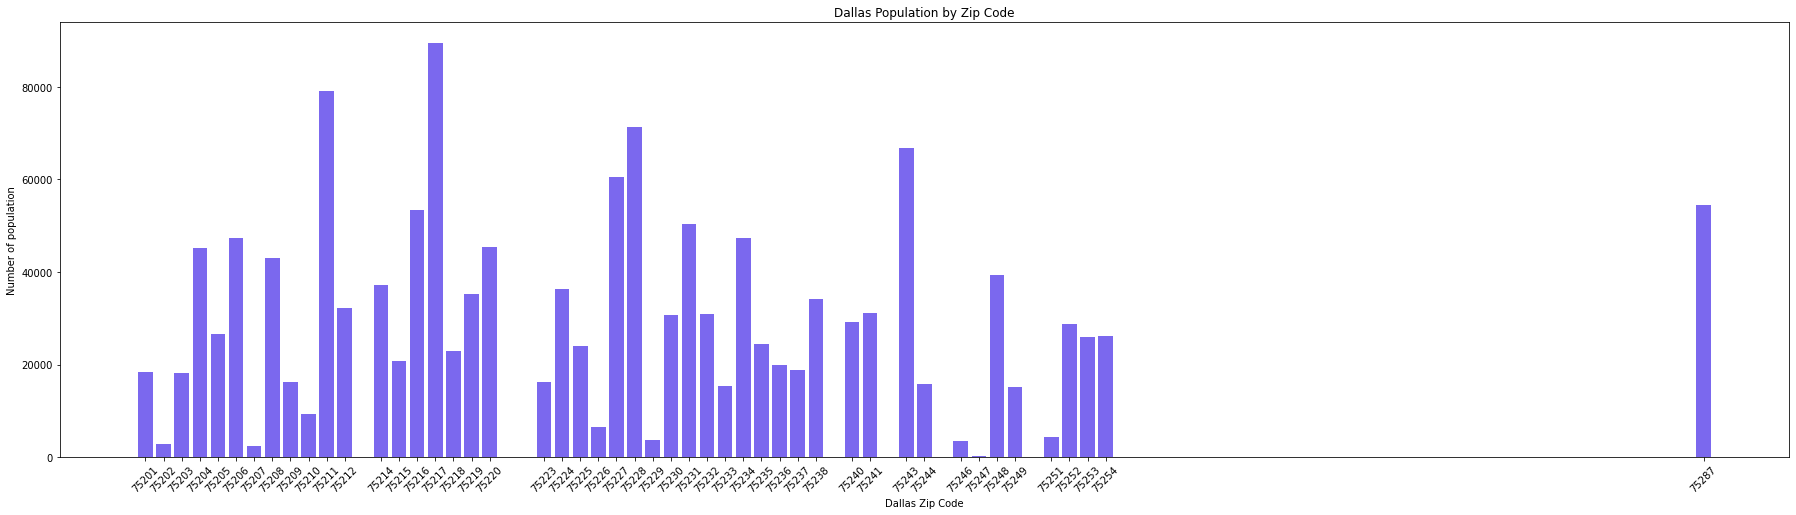

In [19]:
# IDEA: create histogram and see which locations have highest population 
plt.figure(figsize = (31, 8))
plt.xlabel("Dallas Zip Code")
plt.ylabel("Number of population")
plt.title("Dallas Population by Zip Code")
plt.xticks(df_zip["Zip Code"], rotation = 45)
plt.bar(df_zip["Zip Code"], df_zip["Current Population"], color ='mediumslateblue')
plt.show()

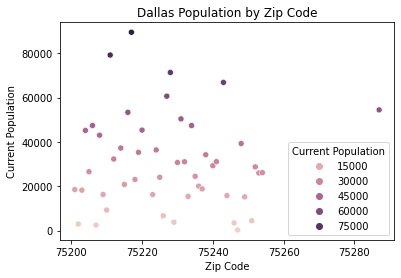

In [20]:
# cp_scatter.set_ylim(9249, 15174, 200)
cp_scatter = sns.scatterplot(data = df_zip, x = "Zip Code", y = "Current Population", hue = "Current Population").set(title = "Dallas Population by Zip Code")

### Analyzing Racial Demographics

In [21]:
df_zip["White Population"].dtypes

dtype('O')

In [22]:
df_zip["White Population"] = df_zip["White Population"].replace(",", "", regex = True)
df_zip["Black Population"] = df_zip["Black Population"].replace(",", "", regex = True)
df_zip["Hispanic Population"] = df_zip["Hispanic Population"].replace(",", "", regex = True)
df_zip["Asian Population"] = df_zip["Asian Population"].replace(",", "", regex = True)
df_zip["American Indian Population"] = df_zip["American Indian Population"].replace(",", "", regex = True)
df_zip["Hawaiian Population"] = df_zip["Hawaiian Population"].replace(",", "", regex = True)
df_zip["Other Population"] = df_zip["Other Population"].replace(",", "", regex = True)

df_zip["White Population"] = df_zip["White Population"].astype(int)
df_zip["Black Population"] = df_zip["Black Population"].astype(int)
df_zip["Hispanic Population"] = df_zip["Hispanic Population"].astype(int)
df_zip["Asian Population"] = df_zip["Asian Population"].astype(int)
df_zip["American Indian Population"] = df_zip["American Indian Population"].astype(int)
df_zip["Hawaiian Population"] = df_zip["Hawaiian Population"].astype(int)
df_zip["Other Population"] = df_zip["Other Population"].astype(int)

<function matplotlib.pyplot.show(*args, **kw)>

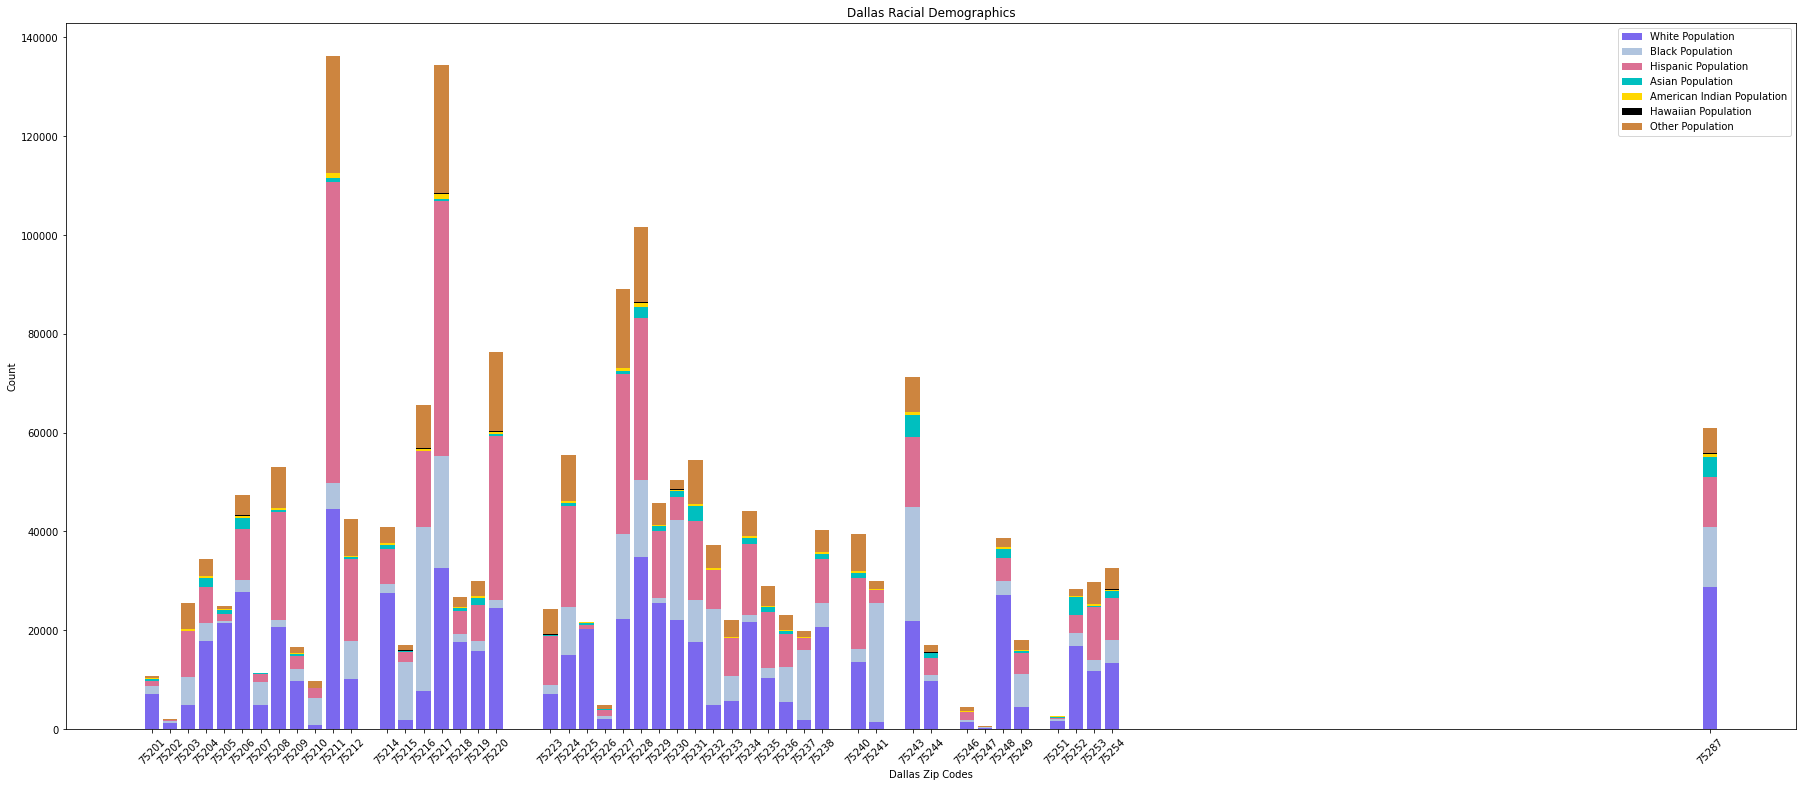

In [23]:
# racial demographic
# IDEA: Stacked plot with legend
plt.figure(figsize = (31, 13))

plt.bar(df_zip["Zip Code"], df_zip["White Population"], color = "mediumslateblue") 
plt.bar(df_zip["Zip Code"], df_zip["Black Population"], bottom = df_zip["White Population"], color = "lightsteelblue")
plt.bar(df_zip["Zip Code"], df_zip["Hispanic Population"], bottom = df_zip["White Population"]+df_zip["Black Population"], color = "palevioletred")
plt.bar(df_zip["Zip Code"], df_zip["Asian Population"], bottom = df_zip["White Population"]+df_zip["Black Population"]+df_zip["Hispanic Population"], color = "c")
plt.bar(df_zip["Zip Code"], df_zip["American Indian Population"], bottom = df_zip["White Population"]+df_zip["Black Population"]+df_zip["Hispanic Population"]+df_zip["Asian Population"], color = "gold")
plt.bar(df_zip["Zip Code"], df_zip["Hawaiian Population"], bottom = df_zip["White Population"]+df_zip["Black Population"]+df_zip["Hispanic Population"]+df_zip["Asian Population"]+df_zip["American Indian Population"], color = "black")
plt.bar(df_zip["Zip Code"], df_zip["Other Population"], bottom = df_zip["White Population"]+df_zip["Black Population"]+df_zip["Hispanic Population"]+df_zip["Asian Population"]+df_zip["American Indian Population"]+df_zip["Hawaiian Population"], color = "peru")

plt.xticks(df_zip["Zip Code"], rotation = 45)
plt.xlabel("Dallas Zip Codes")
plt.ylabel("Count")
plt.legend(["White Population", "Black Population", "Hispanic Population", "Asian Population", "American Indian Population", "Hawaiian Population", "Other Population"])
plt.title("Dallas Racial Demographics")

plt.show

### Analyzing Racial Demographics

In [24]:
df_zip["Male Population"] = df_zip["Male Population"].replace(",", "", regex = True)
df_zip["Female Population"] = df_zip["Female Population"].replace(",", "", regex = True)

df_zip["Male Population"] = df_zip["Male Population"].astype(int)
df_zip["Female Population"] = df_zip["Female Population"].astype(int)

<function matplotlib.pyplot.show(*args, **kw)>

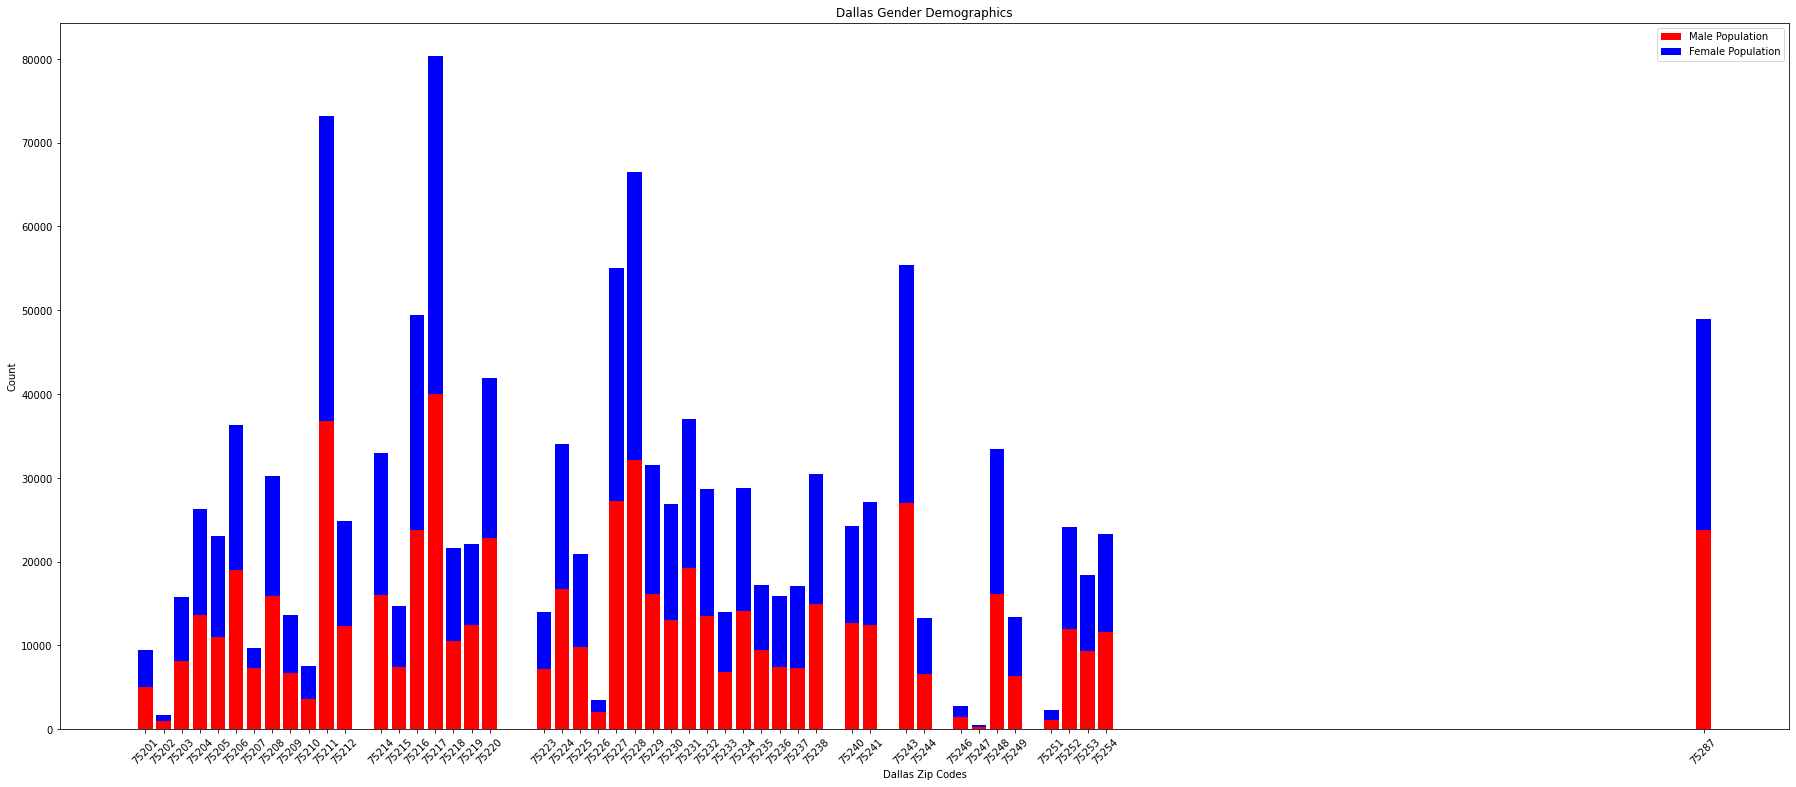

In [25]:
plt.figure(figsize = (31, 13))

plt.bar(df_zip["Zip Code"], df_zip["Male Population"], color = "r")
plt.bar(df_zip["Zip Code"], df_zip["Female Population"], bottom = df_zip["Male Population"], color = "b")

plt.xticks(df_zip["Zip Code"], rotation = 45)
plt.xlabel("Dallas Zip Codes")
plt.ylabel("Count")
plt.legend(["Male Population", "Female Population"])
plt.title("Dallas Gender Demographics")

plt.show

### Analyzing Businesses in the area
See how many businesses are in the area; is the area more business or residential: Compare the number of business mailbox vs home mailbox. 

<function matplotlib.pyplot.show(*args, **kw)>

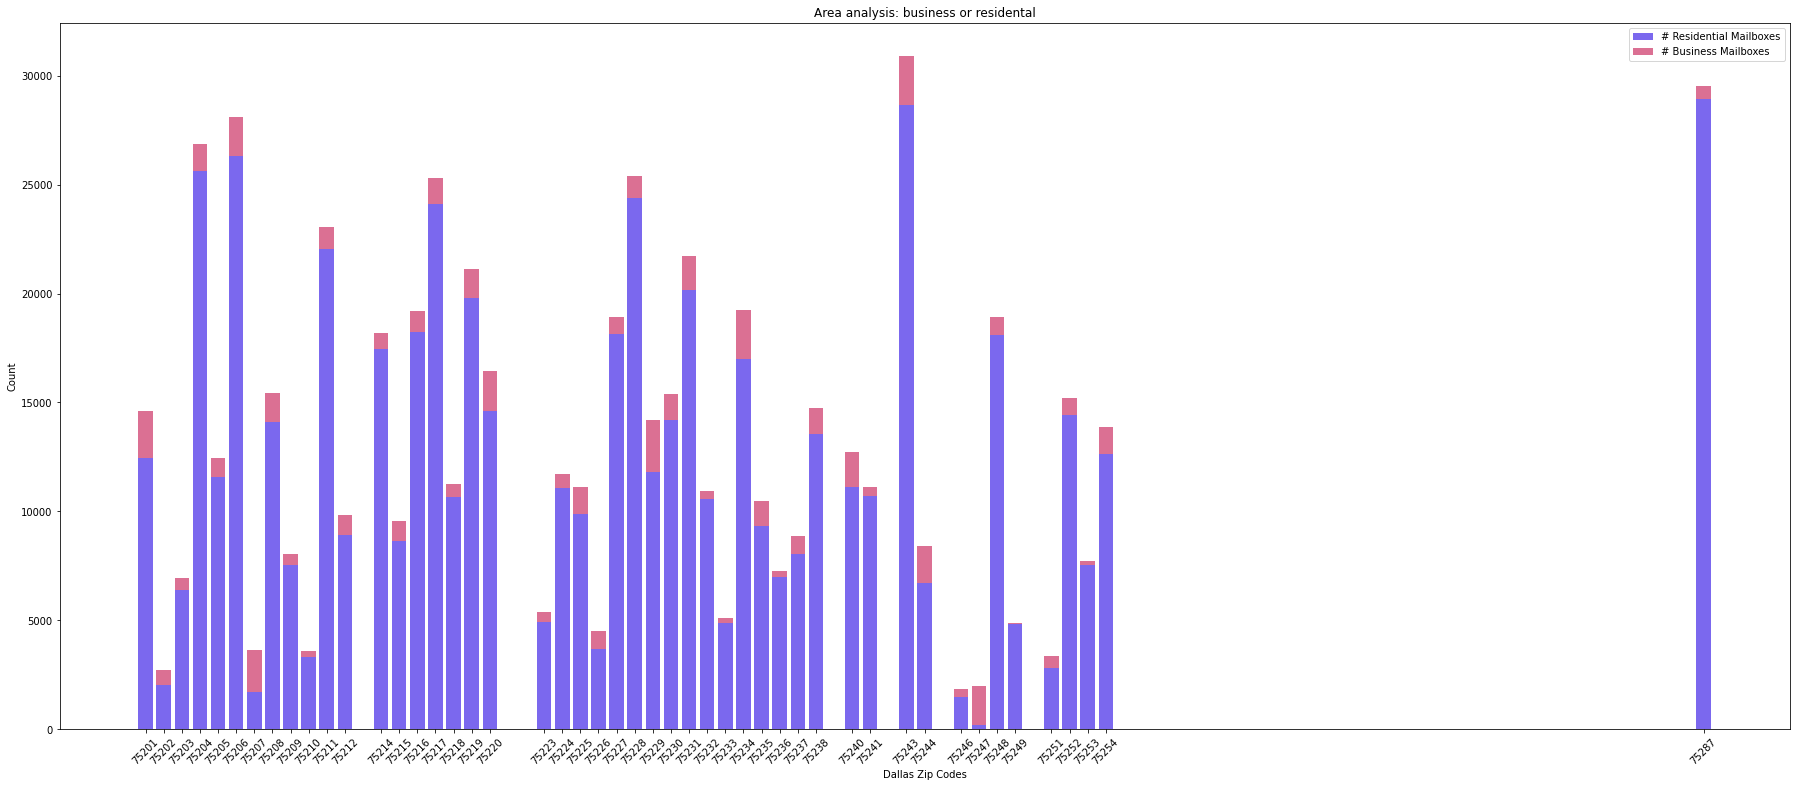

In [26]:
# compare the number of business mailbox vs home mailbox to see how business it is
df_zip["# Residential Mailboxes"] = df_zip["# Residential Mailboxes"].replace(",", "", regex = True)
df_zip["# Residential Mailboxes"] = df_zip["# Residential Mailboxes"].astype(int)
df_zip["# Business Mailboxes"] = df_zip["# Business Mailboxes"].replace(",", "", regex = True)
df_zip["# Business Mailboxes"] = df_zip["# Business Mailboxes"].astype(int)

plt.figure(figsize = (31, 13))

plt.bar(df_zip["Zip Code"], df_zip["# Residential Mailboxes"], color = "mediumslateblue")
plt.bar(df_zip["Zip Code"], df_zip["# Business Mailboxes"], bottom = df_zip["# Residential Mailboxes"], color = "palevioletred")

plt.xticks(df_zip["Zip Code"], rotation = 45)
plt.xlabel("Dallas Zip Codes")
plt.ylabel("Count")
plt.legend(["# Residential Mailboxes", "# Business Mailboxes"])
plt.title("Area analysis: business or residental")

plt.show

- Most homes are residential. 
- Zip code 75247 is more business area
- Zip code 75207 looks to be half business and half residential

Business vs. residential ratio

In [27]:
print(df_zip["# Residential Mailboxes"].head(5))
print(df_zip["# Business Mailboxes"].head(5))

0    12473
1     2050
2     6390
3    25648
4    11586
Name: # Residential Mailboxes, dtype: int64
0    2153
1     658
2     545
3    1232
4     865
Name: # Business Mailboxes, dtype: int64


In [28]:
df_zip["# Residential/Business Mailbox Ratio"] = df_zip["# Residential Mailboxes"]/df_zip["# Business Mailboxes"]
df_zip["# Residential/Business Mailbox Ratio"].head(20)
# if the value: < 0 then more businesses than residential mailboxes
# if the value: > 0 then more residential than business mailboxes

0      5.793312
1      3.115502
2     11.724771
3     20.818182
4     13.394220
5     14.472497
6      0.870077
7     10.610986
8     14.897030
9     12.142336
10    21.516098
11     9.738798
12    23.792916
13     9.911899
14    18.879007
15    20.520000
16    17.380098
17    14.921687
18     8.020856
19    10.891353
Name: # Residential/Business Mailbox Ratio, dtype: float64

In [29]:
df_zip.head(10)

,Zip Code,Latitude,Longitude,Elevation (ft),Current Population,2010 Population,Households Per ZIP code,Average House Value ($),Average Income Per Household ($),Persons Per Household,...,Disabled Workers (2019),Widow(er)s and Parents (2019),Spouses (2019),Children (2019),65+ (2019),Monthly Benefits - All (2019) ($),Monthly Benefits - Retired Workers (2019) ($),Monthy Benefits - Widow(ers) (2019) ($),PMSA Name,# Residential/Business Mailbox Ratio
0,75201,32.787706,-96.799850,455,18460,"9,409","5,821","630,100","94,872",1.48,...,200,50,55,50,775,1862000,1443000,91000,"Dallas, TX PMSA",5.793312
1,75202,32.779910,-96.802744,427,2931,"1,666","1,150","269,200","92,500",1.43,...,20,5,5,15,110,254000,197000,9000,"Dallas, TX PMSA",3.115502
2,75203,32.744837,-96.795597,423,18211,"15,721","5,487","108,600","37,418",2.85,...,405,125,50,155,1180,1886000,1203000,138000,"Dallas, TX PMSA",11.724771
3,75204,32.801944,-96.787577,496,45140,"26,279","14,547","378,600","81,914",1.76,...,305,85,75,110,"1,255",2503000,"1,915,000","107,000","Dallas, TX PMSA",20.818182
4,75205,32.833389,-96.793911,532,26531,"23,061","9,016","1,212,700","159,076",2.29,...,80,180,350,105,"2,405","5,221,000","4,182,000","370,000","Dallas, TX PMSA",13.394220
5,75206,32.833452,-96.771706,589,47359,"36,248","20,176","433,100","75,569",1.80,...,290,205,140,80,"2,365","4,370,000","3,472,000","326,000","Dallas, TX PMSA",14.472497
6,75207,32.781467,-96.821474,400,2449,"9,648",585,-,"85,075",1.44,...,15,5,5,5,100,"223,000","176,000","14,000","Dallas, TX PMSA",0.870077
7,75208,32.751471,-96.838668,533,43011,"30,171","9,807","325,800","66,230",3.05,...,430,225,240,235,"2,965","4,674,000","3,553,000","264,000","Dallas, TX PMSA",10.610986
8,75209,32.844254,-96.833186,500,16249,"13,653","6,282","576,300","99,003",2.16,...,145,145,140,65,"1,895","3,750,000","3,085,000","247,000","Dallas, TX PMSA",14.897030
9,75210,32.764515,-96.736787,412,9249,"7,482","2,680","69,200","26,801",2.78,...,295,85,10,135,655,"1,047,000","631,000","75,000","Dallas, TX PMSA",12.142336


### Average household income

In [30]:
df_zip.columns

Index(['Zip Code', 'Latitude ', 'Longitude', 'Elevation (ft)',
       'Current Population', '2010 Population', 'Households Per ZIP code',
       'Average House Value ($)', 'Average Income Per Household  ($)',
       'Persons Per Household', 'White Population', 'Black Population',
       'Hispanic Population', 'Asian Population', 'American Indian Population',
       'Hawaiian Population', 'Other Population', 'Male Population',
       'Female Population', 'Median Age (years)', 'Male Median Age (years)',
       'Female Median Age (years)', '# Residential Mailboxes',
       '# Business Mailboxes', 'Total Delivery Receptacles',
       'Number of Businesses', '1st Quarter Payroll ($)', 'Annual Payroll ($)',
       '# of Employees', 'Water Area (sq mi)', 'Land Area (sq mi)',
       '113th Congressional District', '113th Congressional Land Area (sq mi)',
       'Single Family Delivery Units', 'Multi Family Delivery Units',
       '# Residential Mailboxes.1', '# Business Mailboxes.1',
       'T

In [31]:
df_zip["Average Income Per Household  ($)"].dtypes

dtype('O')

In [32]:
df_zip["Average Income Per Household  ($)"] = df_zip["Average Income Per Household  ($)"].replace(",", "", regex = True)
df_zip["Average Income Per Household  ($)"] = df_zip["Average Income Per Household  ($)"].astype(int)
df_zip["Average Income Per Household  ($)"].dtypes

dtype('int64')

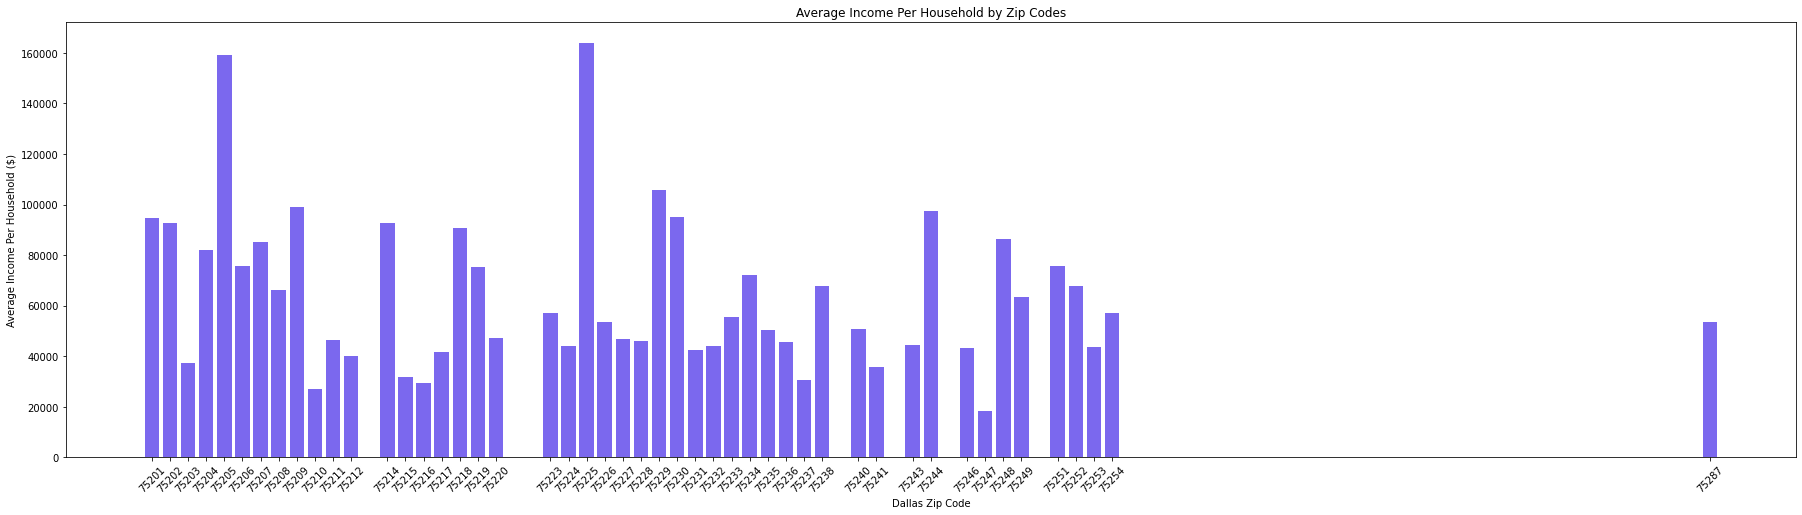

In [33]:
plt.figure(figsize = (31, 8))
plt.xlabel("Dallas Zip Code")
plt.ylabel("Average Income Per Household ($)")
plt.title("Average Income Per Household by Zip Codes")
plt.xticks(df_zip["Zip Code"], rotation = 45)
plt.bar(df_zip["Zip Code"], df_zip["Average Income Per Household  ($)"], color ='mediumslateblue')
plt.show()

### Average house value

In [34]:
df_zip["Average House Value ($)"].isnull().sum()

0

In [38]:
df_zip["Average House Value ($)"].dtypes

dtype('O')

In [37]:
df_zip["Average House Value ($)"].replace(to_replace = " -   ", value = "0", inplace = True)
df_zip["Average House Value ($)"].head

<bound method NDFrame.head of 0        630,100 
1        269,200 
2        108,600 
3        378,600 
4      1,212,700 
5        433,100 
6               0
7        325,800 
8        576,300 
9         69,200 
10       122,100 
11       112,500 
12       516,200 
13        82,000 
14        78,100 
15        94,600 
16       353,700 
17       324,600 
18       296,500 
19       133,000 
20       147,000 
21     1,217,600 
22        81,700 
23       125,300 
24       165,800 
25       430,800 
26       656,600 
27       347,700 
28       133,500 
29       172,300 
30       200,000 
31       192,700 
32       153,100 
33       136,800 
34       398,200 
35       236,500 
36        96,700 
37       264,800 
38       448,300 
39       338,500 
40              0
41       419,300 
42       161,900 
43              0
44       411,000 
45        54,400 
46       288,400 
47       327,500 
Name: Average House Value ($), dtype: object>

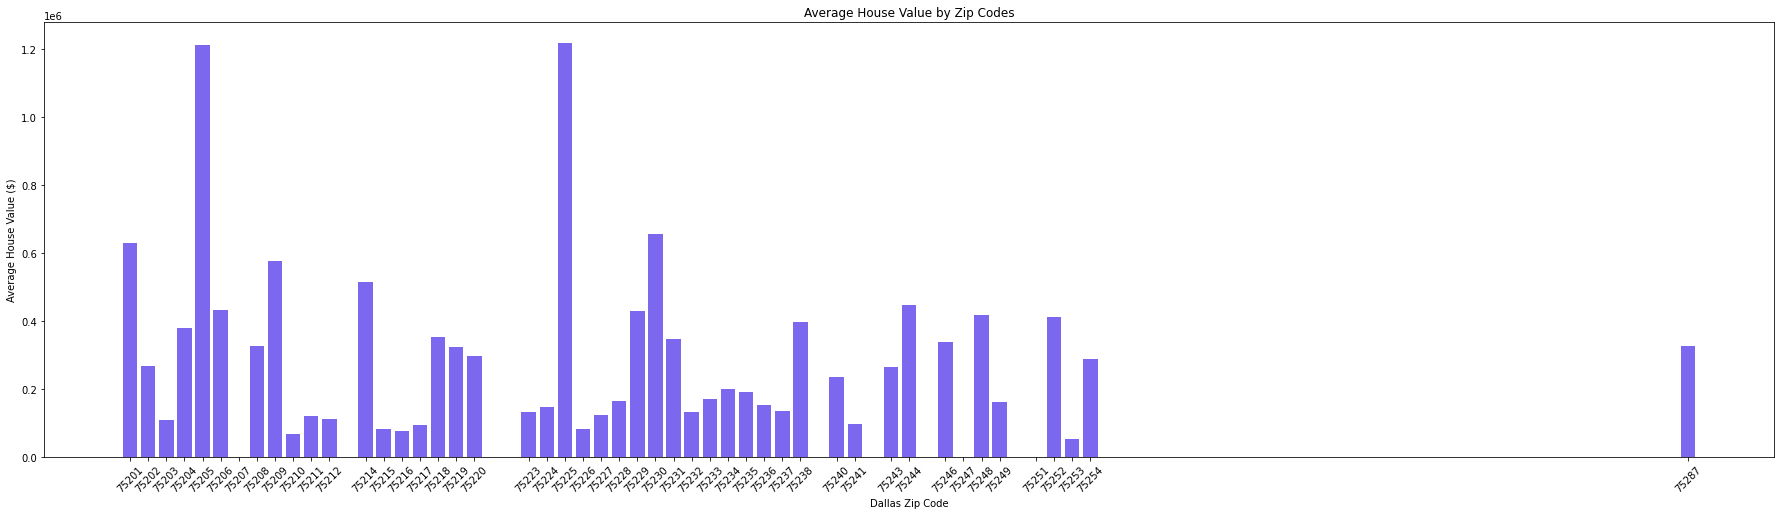

In [39]:
df_zip["Average House Value ($)"] = df_zip["Average House Value ($)"].replace(",", "", regex = True)
df_zip["Average House Value ($)"] = df_zip["Average House Value ($)"].astype(int)
df_zip["Average House Value ($)"].dtypes


plt.figure(figsize = (31, 8))
plt.xlabel("Dallas Zip Code")
plt.ylabel("Average House Value ($)")
plt.title("Average House Value by Zip Codes")
plt.xticks(df_zip["Zip Code"], rotation = 45)
plt.bar(df_zip["Zip Code"], df_zip["Average House Value ($)"], color ='mediumslateblue')
plt.show()

### Preparation for combining dataframes

In [40]:
df_zip.head()

,Zip Code,Latitude,Longitude,Elevation (ft),Current Population,2010 Population,Households Per ZIP code,Average House Value ($),Average Income Per Household ($),Persons Per Household,...,Disabled Workers (2019),Widow(er)s and Parents (2019),Spouses (2019),Children (2019),65+ (2019),Monthly Benefits - All (2019) ($),Monthly Benefits - Retired Workers (2019) ($),Monthy Benefits - Widow(ers) (2019) ($),PMSA Name,# Residential/Business Mailbox Ratio
0,75201,32.787706,-96.799850,455,18460,"9,409","5,821",630100,94872,1.48,...,200,50,55,50,775,1862000,1443000,91000,"Dallas, TX PMSA",5.793312
1,75202,32.779910,-96.802744,427,2931,"1,666","1,150",269200,92500,1.43,...,20,5,5,15,110,254000,197000,9000,"Dallas, TX PMSA",3.115502
2,75203,32.744837,-96.795597,423,18211,"15,721","5,487",108600,37418,2.85,...,405,125,50,155,1180,1886000,1203000,138000,"Dallas, TX PMSA",11.724771
3,75204,32.801944,-96.787577,496,45140,"26,279","14,547",378600,81914,1.76,...,305,85,75,110,"1,255",2503000,"1,915,000","107,000","Dallas, TX PMSA",20.818182
4,75205,32.833389,-96.793911,532,26531,"23,061","9,016",1212700,159076,2.29,...,80,180,350,105,"2,405","5,221,000","4,182,000","370,000","Dallas, TX PMSA",13.394220


In [41]:
df_zip.columns

Index(['Zip Code', 'Latitude ', 'Longitude', 'Elevation (ft)',
       'Current Population', '2010 Population', 'Households Per ZIP code',
       'Average House Value ($)', 'Average Income Per Household  ($)',
       'Persons Per Household', 'White Population', 'Black Population',
       'Hispanic Population', 'Asian Population', 'American Indian Population',
       'Hawaiian Population', 'Other Population', 'Male Population',
       'Female Population', 'Median Age (years)', 'Male Median Age (years)',
       'Female Median Age (years)', '# Residential Mailboxes',
       '# Business Mailboxes', 'Total Delivery Receptacles',
       'Number of Businesses', '1st Quarter Payroll ($)', 'Annual Payroll ($)',
       '# of Employees', 'Water Area (sq mi)', 'Land Area (sq mi)',
       '113th Congressional District', '113th Congressional Land Area (sq mi)',
       'Single Family Delivery Units', 'Multi Family Delivery Units',
       '# Residential Mailboxes.1', '# Business Mailboxes.1',
       'T

In [43]:
drop_final_columns = ["Latitude ", "Longitude", "Elevation (ft)", "2010 Population", "Households Per ZIP code", "Persons Per Household", 
                      "White Population", "Black Population", "Hispanic Population", "Asian Population", "American Indian Population",
                      "Hawaiian Population", "Other Population", "Male Population", "Female Population", "Median Age (years)", "Male Median Age (years)",
                      "Female Median Age (years)", '# Residential Mailboxes', '# Business Mailboxes', 'Total Delivery Receptacles', 'Number of Businesses', 
                      '1st Quarter Payroll ($)', 'Annual Payroll ($)', '# of Employees', 'Water Area (sq mi)', 'Land Area (sq mi)',
                      '113th Congressional District', '113th Congressional Land Area (sq mi)', 'Single Family Delivery Units', 
                      'Multi Family Delivery Units','# Residential Mailboxes.1', '# Business Mailboxes.1', 'Total Delivery Receptacles.1', 
                      'Total Beneficiaries (2019)','Retired Workers (2019)', 'Disabled Workers (2019)', 'Widow(er)s and Parents (2019)', 
                      'Spouses (2019)', 'Children (2019)','65+ (2019)', 'Monthly Benefits - All (2019) ($)',
                      'Monthly Benefits - Retired Workers (2019) ($)','Monthy Benefits - Widow(ers) (2019) ($)', 'PMSA Name']

df_zip = df_zip.drop(drop_final_columns, axis = 1)
df_zip.head()

,Zip Code,Current Population,Average House Value ($),Average Income Per Household ($),# Residential/Business Mailbox Ratio
0,75201,18460,630100,94872,5.793312
1,75202,2931,269200,92500,3.115502
2,75203,18211,108600,37418,11.724771
3,75204,45140,378600,81914,20.818182
4,75205,26531,1212700,159076,13.394220


In [44]:
df_zip.dtypes

Zip Code                                  int64
Current Population                        int64
Average House Value ($)                   int64
Average Income Per Household  ($)         int64
# Residential/Business Mailbox Ratio    float64
dtype: object

In [45]:
df_zip["# Residential/Business Mailbox Ratio"] = df_zip["# Residential/Business Mailbox Ratio"].astype(int)

In [46]:
df_zip.dtypes

Zip Code                                int64
Current Population                      int64
Average House Value ($)                 int64
Average Income Per Household  ($)       int64
# Residential/Business Mailbox Ratio    int64
dtype: object

In [47]:
df_zip.to_csv('Dallas_demographics_readyformodel.csv')
files.download("Dallas_demographics_readyformodel.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>